# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")
from scipy import stats as st


## Load data

In [2]:
# Load the data files into different DataFrames
call = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
message = pd.read_csv('/datasets/megaline_messages.csv')
plan = pd.read_csv('/datasets/megaline_plans.csv')
user = pd.read_csv('/datasets/megaline_users.csv')


## Prepare the data

The data for this project is split into several tables. I plan on exploring each one to get an initial understanding of the data, and will clean, correct, and process data as necessary.

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame

plan.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [4]:
# Print a sample of data for plans

plan.head(20)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


The plan table contains two rows, and one can assume each represents a cellphone plan. 

The columns explains and details the monthly pay, per minute or per message rate, and features included in the plan. 

There does not seem to be any issues such as inappropriate data types or missing data. It makes sense that apart from the plan name, the other columns are of integer or float type.

## Users

In [6]:
# Print the general/summary information about the users' DataFrame

user.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [7]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Print a sample of data for users
user.head(30)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Missing data:
- the *churn_date* column is the only one that contains null objects. Since a significant amount of the data is missing in this column (only 34 out of 500 rows are populated), and considering churn_date is not entirely relevant to conducting user and phone plan studies, my decision is to eliminate the column.

Inaccurate data:
- every city in the table appears to have a typo. "MSA" should be "USA". Furthermore, USA is a country and not a city. I will remove the "MSA" string from the *city* column.


### Fix Data

1. Delete "churn_date" column

In [9]:
user.pop('churn_date')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
495    NaN
496    NaN
497    NaN
498    NaN
499    NaN
Name: churn_date, Length: 500, dtype: object

In [10]:
user.head(30)

,user_id,first_name,last_name,age,city,reg_date,plan
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf


2. remove "MSA" from the "city" column

In [11]:
user['city']=user["city"].str[:-4]

In [12]:
user.head(30)

,user_id,first_name,last_name,age,city,reg_date,plan
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA",2018-12-24,ultimate
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA",2018-08-13,surf
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV",2018-10-21,surf
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK",2018-01-28,surf
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA",2018-05-23,surf
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX",2018-11-29,surf
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA",2018-11-27,ultimate
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI",2018-07-11,surf
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL",2018-08-03,ultimate
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA",2018-04-22,surf


### Enrich Data

It might make our analysis more powerful if we seperate out the *state* information from the current city column. I will create a new state column and deliminate the data as such.

In [13]:
user[['city', 'state']] = user['city'].str.split(',', expand=True)

In [14]:
user.head(30)

,user_id,first_name,last_name,age,city,reg_date,plan,state
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,GA
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,OK
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,WA
5,1005,Livia,Shields,31,Dallas-Fort Worth-Arlington,2018-11-29,surf,TX
6,1006,Jesusa,Bradford,73,San Francisco-Oakland-Berkeley,2018-11-27,ultimate,CA
7,1007,Eusebio,Welch,42,Grand Rapids-Kentwood,2018-07-11,surf,MI
8,1008,Emely,Hoffman,53,Orlando-Kissimmee-Sanford,2018-08-03,ultimate,FL
9,1009,Gerry,Little,19,San Jose-Sunnyvale-Santa Clara,2018-04-22,surf,CA


## Calls

In [15]:
# Print the general/summary information about the calls' DataFrame

call.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [16]:
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# Print a sample of data for calls
call.head(-30)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137700,1499_169,1499,2018-10-27,1.21
137701,1499_170,1499,2018-09-28,9.44
137702,1499_171,1499,2018-12-03,6.88
137703,1499_172,1499,2018-11-22,1.21


The call table appears to be in good shape. There are no miscategorized data types, nor missing values.
Arguably, the *id* column can be simplified - one can assume the number before the dash corresponds with the user_id.
However, there's very little benefit to eliminating the prefix, so I will keep it as it is to err on the safer side.

The call_date column is properly formatted, however, it would be helpful for later analysis to generate a corresponding *weekday* and a *month* column to compare usage across the week. 

For the *duration* column, two things can be done:
1. the premise of the plans are that for calls, each individual call is rounded up. Even if the call lasted just one second, it will be counted as one minute. For this reason, we can preemptively round up the values in the table
2. it would also be helpful to generate an additional categorical column that corresponds to the numerical value. I will divide the duration into its statistical quartiles and label accordingly.

### Fix data

Note there are some call durations that are equal to 0, and they account for a significant portion of the table! 26834/137705 = 19.4%.

For this reason, I think it's prudent to retroactively drop these rows. There's no reason why a 0.00 duration call should impact our analysis and hypothesis results later on.

In [18]:
call['duration'].value_counts()
call = call[call.duration != 0.00]
call.head(-30)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137689,1499_158,1499,2018-12-13,0.40
137691,1499_160,1499,2018-10-11,5.88
137692,1499_161,1499,2018-12-20,2.39
137693,1499_162,1499,2018-12-02,4.49


### Enrich data

First thing we can do is to generate a corresponding *weekday* column to compare usage across the week.

In [19]:
call['weekday'] = pd.DatetimeIndex(call['call_date']).day_name()
call['month'] = pd.DatetimeIndex(call['call_date']).month

In [20]:
call.head(30)

,id,user_id,call_date,duration,weekday,month
0,1000_93,1000,2018-12-27,8.52,Thursday,12
1,1000_145,1000,2018-12-27,13.66,Thursday,12
2,1000_247,1000,2018-12-27,14.48,Thursday,12
3,1000_309,1000,2018-12-28,5.76,Friday,12
4,1000_380,1000,2018-12-30,4.22,Sunday,12
5,1000_388,1000,2018-12-31,2.20,Monday,12
6,1000_510,1000,2018-12-27,5.75,Thursday,12
7,1000_521,1000,2018-12-28,14.18,Friday,12
8,1000_530,1000,2018-12-28,5.77,Friday,12
9,1000_544,1000,2018-12-26,4.40,Wednesday,12


For the *duration* column, two things can be done:
1. the premise of the plans are that for calls, each individual call is rounded up. Even if the call lasted just one second, it will be counted as one minute. For this reason, we can preemptively round up the values in the table
2. it would also be helpful to generate an additional categorical column that corresponds to the numerical value. I will divide the duration into its statistical quartiles and label accordingly.

In [21]:
call['duration'] = call['duration'].apply(np.ceil)

In [22]:
call.describe()

,user_id,duration,month
count,110901.000000,110901.000000,110901.000000
mean,1247.511871,8.875907,9.319231
std,139.475249,5.355181,2.415025
min,1000.000000,1.000000,1.000000
25%,1127.000000,5.000000,8.000000
50%,1247.000000,8.000000,10.000000
75%,1365.000000,12.000000,11.000000
max,1499.000000,38.000000,12.000000


In [23]:
conditions = [
  np.logical_and(call['duration'].gt(0), np.less_equal(call['duration'], 5)), 
  np.logical_and(call['duration'].gt(5), np.less_equal(call['duration'],8)),
  np.logical_and(call['duration'].gt(8), np.less_equal(call['duration'],12)),
  np.logical_and(call['duration'].gt(12), np.less_equal(call['duration'],38))
]

outputs = ['Below 25% Percentile','Between 25%-50% Percentile','Between 51% and 75% Percentile', 'Above 75% Percentile']

call['duration_percentile'] = pd.Series(np.select(conditions, outputs, 'Uncategorized'))


In [24]:
call.head(-30)

,id,user_id,call_date,duration,weekday,month,duration_percentile
0,1000_93,1000,2018-12-27,9.0,Thursday,12,Between 51% and 75% Percentile
1,1000_145,1000,2018-12-27,14.0,Thursday,12,Above 75% Percentile
2,1000_247,1000,2018-12-27,15.0,Thursday,12,Above 75% Percentile
3,1000_309,1000,2018-12-28,6.0,Friday,12,Between 25%-50% Percentile
4,1000_380,1000,2018-12-30,5.0,Sunday,12,Below 25% Percentile
...,...,...,...,...,...,...,...
137689,1499_158,1499,2018-12-13,1.0,Thursday,12,NaN
137691,1499_160,1499,2018-10-11,6.0,Thursday,10,NaN
137692,1499_161,1499,2018-12-20,3.0,Thursday,12,NaN
137693,1499_162,1499,2018-12-02,5.0,Sunday,12,NaN


## Messages

In [25]:
# Print the general/summary information about the messages' DataFrame
message.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [26]:
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [27]:
# Print a sample of data for messages
message.head(30)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


There are no missing data, and nothing seems inappropriation in terms of data category.

### Enrich data

Similar to what we have done for the **Call** table, it would be beneficial to generate a corresponding *weekday* column and *month* to compare usage across the week. 

In [28]:
message['weekday'] = pd.DatetimeIndex(message['message_date']).day_name()
message['month'] = pd.DatetimeIndex(message['message_date']).month

In [29]:
message.head(30)

,id,user_id,message_date,weekday,month
0,1000_125,1000,2018-12-27,Thursday,12
1,1000_160,1000,2018-12-31,Monday,12
2,1000_223,1000,2018-12-31,Monday,12
3,1000_251,1000,2018-12-27,Thursday,12
4,1000_255,1000,2018-12-26,Wednesday,12
5,1000_346,1000,2018-12-29,Saturday,12
6,1000_386,1000,2018-12-30,Sunday,12
7,1000_413,1000,2018-12-31,Monday,12
8,1000_502,1000,2018-12-27,Thursday,12
9,1000_525,1000,2018-12-28,Friday,12


## Internet

In [30]:
# Print the general/summary information about the internet DataFrame

internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [31]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [32]:
# Print a sample of data for the internet traffic

internet.head(30)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


There are no missing values. However, there are *mb_used* values for which the data is 0.0. That data is not very meaningful. I will examine the total account of instances where these occur, and likely eliminate useless rows at this stage. 

In addition, similar to what was performed to the call and the message table, now it's a good time to add a corresponding weekday and a month column.

### Fix data

There are *mb_used* values for which the data is 0.0. That data is not very meaningful. I will examine the total account of instances where these occur, and likely eliminate useless rows at this stage. 

In [33]:
internet['mb_used'].value_counts()

0.00      13747
414.46        8
435.77        8
417.46        7
313.79        7
          ...  
638.12        1
217.39        1
683.90        1
243.97        1
563.11        1
Name: mb_used, Length: 57624, dtype: int64

In [34]:
internet = internet[internet.mb_used != 0.00]
internet.head(-30)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
...,...,...,...,...
104785,1499_180,1499,2018-11-23,378.17
104786,1499_181,1499,2018-10-13,93.85
104787,1499_182,1499,2018-11-09,74.41
104788,1499_183,1499,2018-11-17,839.66


### Enrich data

Similar to what was performed to the call and the message table, now it's a good time to add a corresponding weekday and month column.

In [35]:
internet['weekday'] = pd.DatetimeIndex(internet['session_date']).day_name()
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet.head(-30)

,id,user_id,session_date,mb_used,weekday,month
0,1000_13,1000,2018-12-29,89.86,Saturday,12
2,1000_379,1000,2018-12-28,660.40,Friday,12
3,1000_413,1000,2018-12-26,270.99,Wednesday,12
4,1000_442,1000,2018-12-27,880.22,Thursday,12
5,1001_0,1001,2018-08-24,284.68,Friday,8
...,...,...,...,...,...,...
104785,1499_180,1499,2018-11-23,378.17,Friday,11
104786,1499_181,1499,2018-10-13,93.85,Saturday,10
104787,1499_182,1499,2018-11-09,74.41,Friday,11
104788,1499_183,1499,2018-11-17,839.66,Saturday,11


## Study plan conditions

In [36]:
#Print out the plan conditions and make sure they are clear for you

plan.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Upon cross checking the plan table with project instructions, I see that the plan dataset contains minorly erroneous mb_per_month_included values. They should be corrected to 15000 and 30000 instead.

In [37]:
# Calculate the number of calls made by each user per month. Save the result.

number_of_call = call.groupby(['user_id','month']).count()

# user_call = call.groupby('user_id').count()
number_of_call.head(30)

id  call_date  duration  weekday  duration_percentile
user_id month                                                        
1000    12      16         16        16       16                   16
1001    8       22         22        22       22                   22
        9       38         38        38       38                   38
        10      47         47        47       47                   47
        11      49         49        49       49                   49
        12      46         46        46       46                   46
1002    10       8          8         8        8                    8
        11      48         48        48       48                   48
        12      38         38        38       38                   38
1003    12     118        118       118      118                  118
1004    5       19         19        19       19                   19
        6       33         33        33       33                   33
        7       45         45        45       45                   45
        8       42         42        42       42                   42
        9       32         32        32       32                   32
        10      47         47        47       47                   47
        11      45         45        45       45                   45
        12      43         43        43       43                   43
1005    12      50         50        50       50                   50
1006    11       2          2         2        2                    2
        12       7          7         7        7                    7
1007    8       56         56        56       56                   56
        9       49         49        49       49                   49
        10      70         70        70       70                   70
        11      61         61        61       61                   61
        12      71         71        71       71                   71
1008    10      54         54        54       54                   54
        11      50         50        50       50                   50
        12      65         65        65       65                   65
1009    5       61         61        61       61                   61

In [38]:
# Calculate the amount of minutes spent by each user per month. Save the result.

amount_of_minutes = call.groupby(['user_id','month']).sum()
amount_of_minutes.head(30)

duration
user_id month          
1000    12        124.0
1001    8         182.0
        9         315.0
        10        393.0
        11        426.0
        12        412.0
1002    10         59.0
        11        386.0
        12        384.0
1003    12       1104.0
1004    5         193.0
        6         275.0
        7         381.0
        8         354.0
        9         301.0
        10        365.0
        11        476.0
        12        427.0
1005    12        496.0
1006    11         10.0
        12         59.0
1007    8         456.0
        9         399.0
        10        645.0
        11        524.0
        12        617.0
1008    10        476.0
        11        446.0
        12        634.0
1009    5         534.0

In [39]:
call.groupby(['user_id','month']).agg({'duration' : ('count','sum')}).reset_index()

user_id month duration       
                      count    sum
0       1000    12       16  124.0
1       1001     8       22  182.0
2       1001     9       38  315.0
3       1001    10       47  393.0
4       1001    11       49  426.0
...      ...   ...      ...    ...
2251    1498    12       32  339.0
2252    1499     9       35  346.0
2253    1499    10       41  385.0
2254    1499    11       39  308.0
2255    1499    12       56  496.0

[2256 rows x 4 columns]

In [40]:
# Calculate the number of messages sent by each user per month. Save the result.

number_of_messages = message.groupby(['user_id','month']).count()
number_of_messages.head(30)


id  message_date  weekday
user_id month                            
1000    12      11            11       11
1001    8       30            30       30
        9       44            44       44
        10      53            53       53
        11      36            36       36
        12      44            44       44
1002    10      15            15       15
        11      32            32       32
        12      41            41       41
1003    12      50            50       50
1004    5        7             7        7
        6       18            18       18
        7       26            26       26
        8       25            25       25
        9       21            21       21
        10      24            24       24
        11      25            25       25
        12      31            31       31
1005    12      11            11       11
1006    11      15            15       15
        12     139           139      139
1007    8       51            51       51
        9       47            47       47
        10      59            59       59
        11      48            48       48
        12      50            50       50
1008    10      21            21       21
        11      37            37       37
        12      26            26       26
1011    6       21            21       21

In [41]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

volume_of_internet = internet.groupby(['user_id','month']).sum()
volume_of_internet.head(30)

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
        12     19369.18
1002    10      6552.01
        11     19345.08
        12     14396.24
1003    12     27044.14
1004    5       6547.21
        6      20672.82
        7      24516.62
        8      27981.74
        9      18852.72
        10     14541.63
        11     21850.78
        12     21389.29
1005    12     17140.17
1006    11      2068.37
        12     32118.82
1007    8      24439.88
        9      28123.95
        10     37885.63
        11     24334.00
        12     29069.28
1008    10     17106.99
        11     23676.72
        12     14689.33
1009    5      20389.40

The next step is to put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.

For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

In [42]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
# result1 = pd.merge(number_of_call,
#                  amount_of_minutes,
#                  on='user_id', 
#                  how='outer', 
#                  indicator=True)

# result1 = result1[result1._merge == "both"]
# result1['_merge'].value_counts()


df = pd.concat([number_of_call['call_date'],amount_of_minutes['duration'],number_of_messages['message_date'],volume_of_internet], axis=1)
df.head(20)


call_date  duration  message_date   mb_used
user_id month                                             
1000    12          16.0     124.0          11.0   1901.47
1001    8           22.0     182.0          30.0   6919.15
        9           38.0     315.0          44.0  13314.82
        10          47.0     393.0          53.0  22330.49
        11          49.0     426.0          36.0  18504.30
        12          46.0     412.0          44.0  19369.18
1002    10           8.0      59.0          15.0   6552.01
        11          48.0     386.0          32.0  19345.08
        12          38.0     384.0          41.0  14396.24
1003    12         118.0    1104.0          50.0  27044.14
1004    5           19.0     193.0           7.0   6547.21
        6           33.0     275.0          18.0  20672.82
        7           45.0     381.0          26.0  24516.62
        8           42.0     354.0          25.0  27981.74
        9           32.0     301.0          21.0  18852.72
        10          47.0     365.0          24.0  14541.63
        11          45.0     476.0          25.0  21850.78
        12          43.0     427.0          31.0  21389.29
1005    12          50.0     496.0          11.0  17140.17
1006    11           2.0      10.0          15.0   2068.37

In [43]:
df = df.reset_index()

In [44]:
# Add the plan information

data = pd.merge(left = df, right = user, on=['user_id'])
data.rename(columns={"call_date": "number_of_call", "duration": "amount_of_minutes", "message_date":'number_of_messages',"mb_used":"volume_of_internet"})

,user_id,month,number_of_call,amount_of_minutes,number_of_messages,volume_of_internet,first_name,last_name,age,city,reg_date,plan,state
0,1000,12,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,GA
1,1001,8,22.0,182.0,30.0,6919.15,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
2,1001,9,38.0,315.0,44.0,13314.82,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
3,1001,10,47.0,393.0,53.0,22330.49,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
4,1001,11,49.0,426.0,36.0,18504.30,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,32.0,339.0,NaN,23137.69,Scot,Williamson,51,New York-Newark-Jersey City,2018-02-04,surf,NY-NJ-PA
2289,1499,9,35.0,346.0,NaN,12984.76,Shena,Dickson,37,Orlando-Kissimmee-Sanford,2018-05-06,surf,FL
2290,1499,10,41.0,385.0,NaN,19492.43,Shena,Dickson,37,Orlando-Kissimmee-Sanford,2018-05-06,surf,FL
2291,1499,11,39.0,308.0,NaN,16813.83,Shena,Dickson,37,Orlando-Kissimmee-Sanford,2018-05-06,surf,FL


In [45]:
data.head(20)

,user_id,month,call_date,duration,message_date,mb_used,first_name,last_name,age,city,reg_date,plan,state
0,1000,12,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,GA
1,1001,8,22.0,182.0,30.0,6919.15,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
2,1001,9,38.0,315.0,44.0,13314.82,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
3,1001,10,47.0,393.0,53.0,22330.49,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
4,1001,11,49.0,426.0,36.0,18504.30,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
5,1001,12,46.0,412.0,44.0,19369.18,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
6,1002,10,8.0,59.0,15.0,6552.01,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV
7,1002,11,48.0,386.0,32.0,19345.08,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV
8,1002,12,38.0,384.0,41.0,14396.24,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV
9,1003,12,118.0,1104.0,50.0,27044.14,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,OK


I will now calculate the monthly revenue from each user:
- subtract the free package limit from the total number of calls, text messages, and data
- multiply the result by the calling plan value
- add the monthly charge depending on the calling plan

NOTE: the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

If plan is surf:
- base charge is $20
- monthly minutes - 500; exceeding 3 cents per minute
- monthly texts - 50; exceeding 3 cents per text
- monthly data - 15; exceeding 10 dollars per GB

If the plan is ultimate:
- base charge is $70
- monthly minutes - 3000; exceeding 1 cent per minute
- monthly texts - 1000; exceeding 1 cent per text
- monthly data - 30; exceeding 7 dollars per GB

In [46]:
# Calculate the monthly revenue for each user
# Create a duplicate of the data dataframe
revenue = data

In [47]:
# Transform the "mb_used" column to reflect the round-up policy of both data plans

revenue["mb_used"] = 1/1000 * revenue["mb_used"]
revenue["mb_used"] = revenue["mb_used"].apply(np.ceil)


In [48]:
# Generate excess numbers for text, call, and data 
# Surf plan
revenue['duration'].mask(revenue['plan']== 'surf',revenue['duration']-500,inplace= True)
revenue.loc[data['duration'] <=0, "duration"] = 0

revenue['message_date'].mask(revenue['plan']== 'surf',revenue['message_date']-50,inplace= True)
revenue.loc[revenue['message_date'] <=0, 'message_date'] = 0

revenue['mb_used'].mask(revenue['plan']== 'surf',revenue['mb_used']-15,inplace= True)
revenue.loc[revenue['mb_used'] <=0, 'mb_used'] = 0

revenue['base_cost']=0
revenue['excess_call_fee'] = 0
revenue['excess_text_fee'] = 0
revenue['excess_data_fee'] = 0
revenue['base_cost'].mask(revenue['plan']== 'surf', 20 ,inplace= True)


In [49]:
# Ultimate plan 
revenue['duration'].mask(revenue['plan']== 'ultimate',revenue['duration']-3000,inplace= True)
revenue.loc[data['duration'] <=0, "duration"] = 0

revenue['message_date'].mask(revenue['plan']== 'ultimate',revenue['message_date']-1000,inplace= True)
revenue.loc[revenue['message_date'] <=0, 'message_date'] = 0

revenue['mb_used'].mask(revenue['plan']== 'ultimate',revenue['mb_used']-30,inplace= True)
revenue.loc[revenue['mb_used'] <=0, 'mb_used'] = 0

revenue['base_cost'].mask(revenue['plan']== 'ultimate', 70 ,inplace= True)

In [50]:
# Total charge calculations based on different criteria for surf 
revenue ['excess_call_fee'] = np.where(revenue['plan']== 'surf',
                                           revenue ['duration'] * 0.03,
                                           revenue ['duration'])


revenue ['excess_text_fee'] = np.where(revenue['plan']== 'surf',
                                           revenue ['message_date'] * 0.03,
                                           revenue ['message_date'])

revenue ['excess_data_fee'] = np.where(revenue['plan']== 'surf',
                                           revenue ['mb_used'] * 10,
                                           revenue ['mb_used'])

column_names = ['base_cost', 'excess_call_fee', 'excess_text_fee', 'excess_data_fee']
revenue['total_cost']= revenue[column_names].sum(axis=1)

In [51]:
# Ultimate plan monthly charges

revenue ['excess_call_fee'] = np.where(revenue['plan']== 'ultime',
                                           revenue ['duration'] * 0.01,
                                           revenue ['duration'])


revenue ['excess_text_fee'] = np.where(revenue['plan']== 'ultime',
                                           revenue ['message_date'] * 0.01,
                                           revenue ['message_date'])

revenue ['excess_data_fee'] = np.where(revenue['plan']== 'ultime',
                                           revenue ['mb_used'] * 7,
                                           revenue ['mb_used'])

column_names = ['base_cost', 'excess_call_fee', 'excess_text_fee', 'excess_data_fee']
revenue['total_cost']= revenue[column_names].sum(axis=1)

In [52]:
revenue.head(50)

,user_id,month,call_date,duration,message_date,mb_used,first_name,last_name,age,city,reg_date,plan,state,base_cost,excess_call_fee,excess_text_fee,excess_data_fee,total_cost
0,1000,12,16.0,0.0,0.0,0.0,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,GA,70,0.0,0.0,0.0,70.0
1,1001,8,22.0,0.0,0.0,0.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,0.0,20.0
2,1001,9,38.0,0.0,0.0,0.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,0.0,20.0
3,1001,10,47.0,0.0,3.0,8.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,3.0,8.0,31.0
4,1001,11,49.0,0.0,0.0,4.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,4.0,24.0
5,1001,12,46.0,0.0,0.0,5.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,5.0,25.0
6,1002,10,8.0,0.0,0.0,0.0,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV,20,0.0,0.0,0.0,20.0
7,1002,11,48.0,0.0,0.0,5.0,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV,20,0.0,0.0,5.0,25.0
8,1002,12,38.0,0.0,0.0,0.0,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV,20,0.0,0.0,0.0,20.0
9,1003,12,118.0,604.0,0.0,13.0,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,OK,20,604.0,0.0,13.0,637.0


## Study user behaviour

In this section, I will calculate descriptive statistics and generate histograms for the aggregated data.

Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots are calculated on a per-plan basis.

I will calculate the mean, variance, and standard deviation and describe the distribution in terms of the minutes, texts, and volume of data the users of each plan require per month.

### Calls

In [54]:
data = pd.merge(left = df, right = user, on=['user_id'])
data.rename(columns={"call_date": "number_of_call", "duration": "amount_of_minutes", "message_date":'number_of_messages',"mb_used":"volume_of_internet"})

,user_id,month,number_of_call,amount_of_minutes,number_of_messages,volume_of_internet,first_name,last_name,age,city,reg_date,plan,state
0,1000,12,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,GA
1,1001,8,22.0,182.0,30.0,6919.15,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
2,1001,9,38.0,315.0,44.0,13314.82,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
3,1001,10,47.0,393.0,53.0,22330.49,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
4,1001,11,49.0,426.0,36.0,18504.30,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,32.0,339.0,NaN,23137.69,Scot,Williamson,51,New York-Newark-Jersey City,2018-02-04,surf,NY-NJ-PA
2289,1499,9,35.0,346.0,NaN,12984.76,Shena,Dickson,37,Orlando-Kissimmee-Sanford,2018-05-06,surf,FL
2290,1499,10,41.0,385.0,NaN,19492.43,Shena,Dickson,37,Orlando-Kissimmee-Sanford,2018-05-06,surf,FL
2291,1499,11,39.0,308.0,NaN,16813.83,Shena,Dickson,37,Orlando-Kissimmee-Sanford,2018-05-06,surf,FL


In [55]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
# Surf plan average duration of call per month
import matplotlib.pyplot as plt
surf = data[data['plan']=='surf']
surf.head(20)

,user_id,month,call_date,duration,message_date,mb_used,first_name,last_name,age,city,reg_date,plan,state
1,1001,8,22.0,182.0,30.0,6919.15,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
2,1001,9,38.0,315.0,44.0,13314.82,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
3,1001,10,47.0,393.0,53.0,22330.49,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
4,1001,11,49.0,426.0,36.0,18504.30,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
5,1001,12,46.0,412.0,44.0,19369.18,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA
6,1002,10,8.0,59.0,15.0,6552.01,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV
7,1002,11,48.0,386.0,32.0,19345.08,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV
8,1002,12,38.0,384.0,41.0,14396.24,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV
9,1003,12,118.0,1104.0,50.0,27044.14,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,OK
10,1004,5,19.0,193.0,7.0,6547.21,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,WA


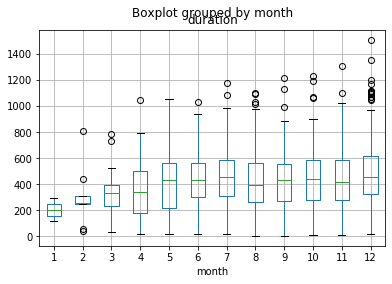

In [56]:
# Plot a boxplot to visualize the distribution of the monthly call duration
# Surf
surf.boxplot('duration', by = 'month')
plt.show()

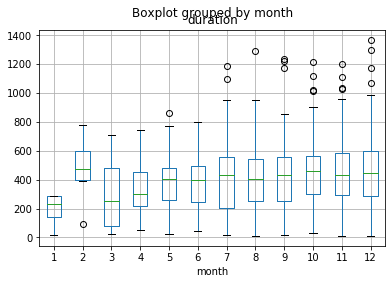

In [57]:
# Plot a boxplot to visualize the distribution of the monthly call duration
# Ultimate

ultimate = data[data['plan']=='ultimate']
ultimate.boxplot('duration', by = 'month')
plt.show()

In [58]:
# Calculate the mean and the variance of the monthly call duration
ultimate_duration = ultimate['duration']
surf_duration = surf['duration']

ultimate_duration.describe()


count     712.000000
mean      435.286517
std       237.459650
min        10.000000
25%       263.000000
50%       425.500000
75%       566.000000
max      1369.000000
Name: duration, dtype: float64

In [59]:
variance_ultimate = 237.459650 * 237.459650

In [60]:
surf_duration.describe()


count    1544.000000
mean      436.802461
std       229.088544
min         2.000000
25%       279.000000
50%       430.000000
75%       579.000000
max      1510.000000
Name: duration, dtype: float64

In [61]:
variance_surf = 229.088544 * 229.088544

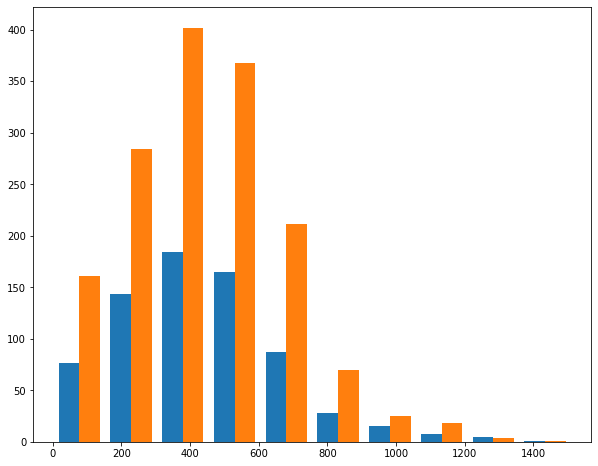

In [62]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

plt.figure(figsize=[10,8])
x = ultimate['duration']
y = surf['duration']
n, bins, patches = plt.hist([x, y])

#### Call Conclusions

1. Mean -> observing the average between the two plans, users' average duration of phone call did not differ dramatically. For the surf plan group avg is 436 min and for the ultimate plan the average is 435 min by month.

    - Our boxplots above confirms the similarity between the plans' means. There's no significant difference between plan usages by months. That means, users of both plans speak about 400+ minutes on phone calls.

2. Variance --> the ultimate group users have a larger variance, indicating that call duration in the ultimate user group are farther from the mean and farther from each other, resulting in a wider spread of data.

3. Distribution and implications --> 
    - When we look at the histogram above, both plans display a negative skew, indicating that most users of both plans tend to speak on the lower end of duration. 
    - The skewed distribution increases to peak at 400-600 for both groups, although the aggregate duration of ultimate plan users are higher. 
    - This makes intuitive sense as high call-duration users would self select and opt for a plan that allows for more minutes. 

### Messages

In [63]:
# Compare the number of messages users of each plan tend to send each month
surf_messages = surf['message_date']
ultimate_messages = ultimate['message_date']

In [64]:
surf_messages.describe()

count    1222.000000
mean       40.109656
std        33.035500
min         1.000000
25%        16.000000
50%        32.000000
75%        54.000000
max       266.000000
Name: message_date, dtype: float64

In [65]:
ultimate_messages.describe()

count    584.000000
mean      46.296233
std       32.942118
min        1.000000
25%       21.000000
50%       41.000000
75%       66.000000
max      166.000000
Name: message_date, dtype: float64

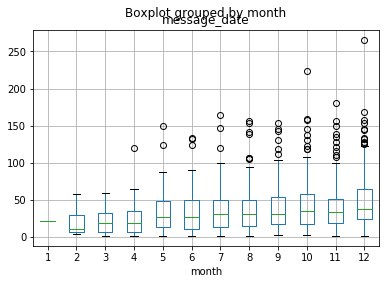

In [66]:
surf.boxplot('message_date', by = 'month')
plt.show()

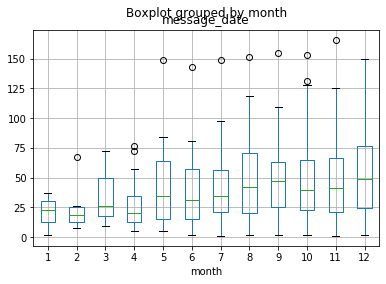

In [67]:
ultimate.boxplot('message_date', by = 'month')
plt.show()

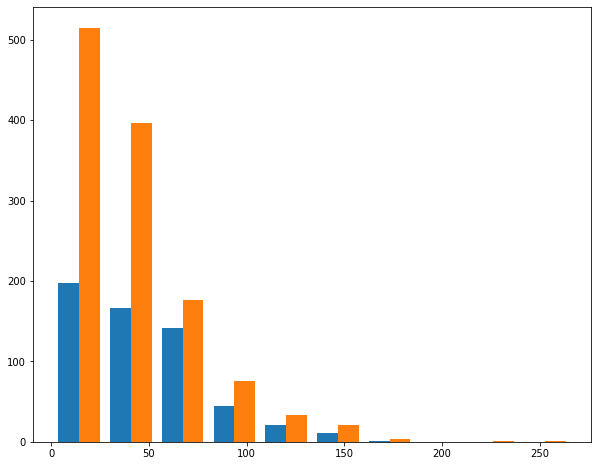

In [68]:

plt.figure(figsize=[10,8])
x = ultimate_messages
y = surf_messages
n, bins, patches = plt.hist([x, y])

#### Message Conclusions

1. Mean -> observing the average between the two plans, ultimate plan users has a higher average at 46 messages, and the surf plan group avg is 40.

    - Our boxplots confirms that the ultimate plan users has a higher average messages sent by month. Surf plan has more outliers over-sending messages beyond its plan base limit. Ultimate plan users has longer "whiskers", indicating a larger range of messages sent. This makes intuitive sense as the message limit for the ultimate plan is fairly high, at 1000 messages.

2. Variance --> the two groups have very similar variance at about 1024. This means that the amount of messages sent by either groups are not too far from the mean or far from each other, resulting in a less wide spread of data.

3. Distribution and implications --> 
    - When we look at the histogram above, both plans display a negative skew, indicating that most users of both plans text an lower amount of messages. 
    - The skewed distribution peaks immediately at 0-50 count for both groups, and decreases steadily over higher counts, although the aggregate message amount of ultimate plan users are higher. 
    - This makes intuitive sense as high text-amount users would self select and opt for a plan that allows for more messages. 

### Internet

In [69]:
surf_internet = surf['mb_used']
ultimate_internet = ultimate['mb_used']


In [70]:
surf_internet.describe()


count     1558.000000
mean     16717.702137
std       7884.682983
min         92.310000
25%      12187.955000
50%      16923.830000
75%      21039.860000
max      70931.590000
Name: mb_used, dtype: float64

In [71]:
surf_internet_variance = 7884*7884
print(surf_internet_variance)

62157456


In [72]:
ultimate_internet.describe()


count      719.000000
mean     17238.642253
std       7831.018323
min        233.170000
25%      12671.130000
50%      16863.450000
75%      21025.155000
max      46595.330000
Name: mb_used, dtype: float64

In [73]:
ultimate_internet_variance = 7831.018323 * 7831.018323
print(ultimate_internet_variance)

61324847.97516174


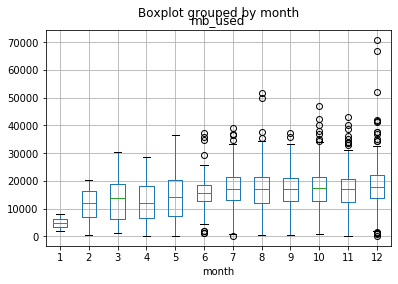

In [74]:
surf.boxplot('mb_used', by = 'month')
plt.show()


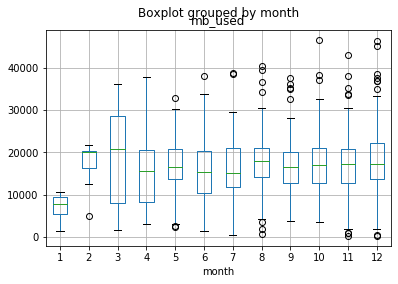

In [75]:
ultimate.boxplot('mb_used', by = 'month')
plt.show()


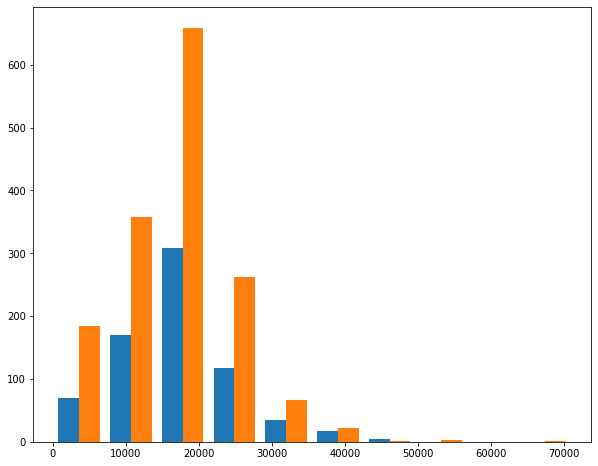

In [76]:
plt.figure(figsize=[10,8])
x = ultimate_internet
y = surf_internet
n, bins, patches = plt.hist([x, y])

#### Internet Conclusions

1. Mean -> observing the average between the two plans, ultimate plan users has a higher internet usage at 17238 mb, and the surf plan group avg is 16717.

    - Our boxplots confirms that the ultimate plan users has a higher average internet usages by month. Surf plan has more outliers over-using data beyond its plan base limit. Ultimate plan users has longer "whiskers" and wider ranges i.e. boxes, indicating a larger range of internet usage. This makes intuitive sense as the internet limit for the ultimate plan is fairly high, at 30 GB.

2. Variance --> the ultimate plan group has an enormous variance! This means that the amount of internet usage of this group is far from the mean and far from each other, resulting in a  wide spread of data -- which is evident in the boxplot. 

3. Distribution and implications --> 
    - When we look at the histogram above, although the shape of distribution is not perfectly normal, it is fairly bell-shaped with just a slight negative skew.
    - The faily-normal distribution peaks at 10000-20000 mb of internet count for both groups.
    - The aggregate internet usage of ultimate plan users are higher. This makes intuitive sense as these users would self select and opt for a plan that allows for more internet mbs. 

## Revenue

In [77]:
surf_revenue = revenue[revenue['plan'] == 'surf']
surf_revenue.head(20)

,user_id,month,call_date,duration,message_date,mb_used,first_name,last_name,age,city,reg_date,plan,state,base_cost,excess_call_fee,excess_text_fee,excess_data_fee,total_cost
1,1001,8,22.0,0.0,0.0,0.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,0.0,20.0
2,1001,9,38.0,0.0,0.0,0.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,0.0,20.0
3,1001,10,47.0,0.0,3.0,8.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,3.0,8.0,31.0
4,1001,11,49.0,0.0,0.0,4.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,4.0,24.0
5,1001,12,46.0,0.0,0.0,5.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,5.0,25.0
6,1002,10,8.0,0.0,0.0,0.0,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV,20,0.0,0.0,0.0,20.0
7,1002,11,48.0,0.0,0.0,5.0,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV,20,0.0,0.0,5.0,25.0
8,1002,12,38.0,0.0,0.0,0.0,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV,20,0.0,0.0,0.0,20.0
9,1003,12,118.0,604.0,0.0,13.0,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,OK,20,604.0,0.0,13.0,637.0
10,1004,5,19.0,0.0,0.0,0.0,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,WA,20,0.0,0.0,0.0,20.0


In [78]:
ultimate_revenue = revenue[revenue['plan'] == 'ultimate']
ultimate_revenue.head(20)

,user_id,month,call_date,duration,message_date,mb_used,first_name,last_name,age,city,reg_date,plan,state,base_cost,excess_call_fee,excess_text_fee,excess_data_fee,total_cost
0,1000,12,16.0,0.0,0.0,0.0,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,GA,70,0.0,0.0,0.0,70.0
19,1006,11,2.0,0.0,0.0,0.0,Jesusa,Bradford,73,San Francisco-Oakland-Berkeley,2018-11-27,ultimate,CA,70,0.0,0.0,0.0,70.0
20,1006,12,7.0,0.0,0.0,3.0,Jesusa,Bradford,73,San Francisco-Oakland-Berkeley,2018-11-27,ultimate,CA,70,0.0,0.0,3.0,73.0
26,1008,10,54.0,0.0,0.0,0.0,Emely,Hoffman,53,Orlando-Kissimmee-Sanford,2018-08-03,ultimate,FL,70,0.0,0.0,0.0,70.0
27,1008,11,50.0,0.0,0.0,0.0,Emely,Hoffman,53,Orlando-Kissimmee-Sanford,2018-08-03,ultimate,FL,70,0.0,0.0,0.0,70.0
28,1008,12,65.0,0.0,0.0,0.0,Emely,Hoffman,53,Orlando-Kissimmee-Sanford,2018-08-03,ultimate,FL,70,0.0,0.0,0.0,70.0
46,1011,6,13.0,0.0,0.0,0.0,Halina,Henry,73,Cleveland-Elyria,2018-01-18,ultimate,OH,70,0.0,0.0,0.0,70.0
47,1011,7,49.0,0.0,0.0,0.0,Halina,Henry,73,Cleveland-Elyria,2018-01-18,ultimate,OH,70,0.0,0.0,0.0,70.0
48,1011,8,49.0,0.0,0.0,0.0,Halina,Henry,73,Cleveland-Elyria,2018-01-18,ultimate,OH,70,0.0,0.0,0.0,70.0
49,1011,9,55.0,0.0,0.0,0.0,Halina,Henry,73,Cleveland-Elyria,2018-01-18,ultimate,OH,70,0.0,0.0,0.0,70.0


In [79]:
surf_revenue['total_cost'].describe()

count    1573.000000
mean       92.627463
std       133.093019
min        20.000000
25%        20.000000
50%        29.000000
75%       110.000000
max      1128.000000
Name: total_cost, dtype: float64

In [80]:
surf_revenue_variane =  133.093019* 133.093019
print (surf_revenue_variane)

17713.75170653436


In [81]:
ultimate_revenue['total_cost'].describe()


count    720.000000
mean      70.386111
std        1.810440
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max       87.000000
Name: total_cost, dtype: float64

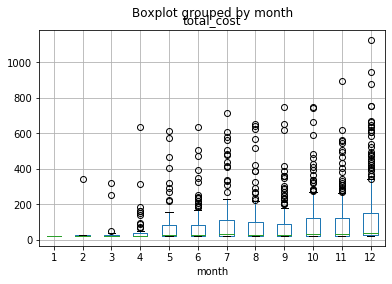

In [82]:
surf_revenue.boxplot('total_cost',by='month')
plt.show()

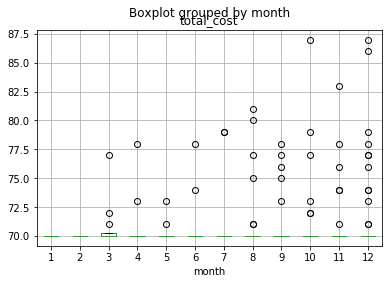

In [83]:
ultimate_revenue.boxplot('total_cost',by='month')
plt.show()


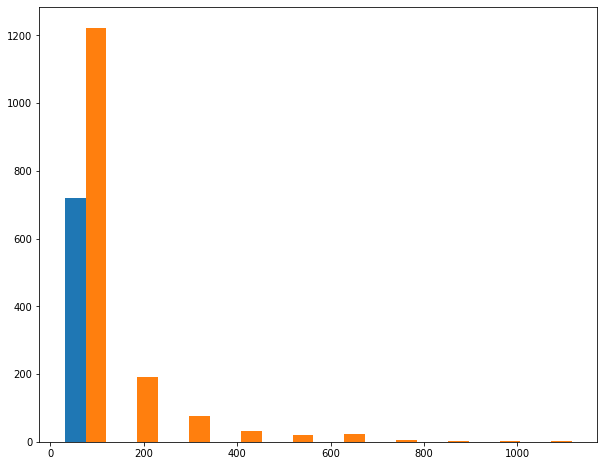

In [84]:
plt.figure(figsize=[10,8])
x = ultimate_revenue['total_cost']
y = surf_revenue['total_cost']
n, bins, patches = plt.hist([x, y])

#### Revenue Conclusions

1. Mean -> observing the average between the two plans, **ultimate plan users has a surpringly lower cost at 70 per month (same as its base cost), while the avg of the total cost of the surf plan is 92.**

    - Our boxplots confirms that the ultimate plan users has a lower cost/revenue by month. Surf plan has more outliers. It also has longer "whiskers" and wider ranges i.e. boxes, indicating a larger range of plan revenue. This makes intuitive sense as it can be easy to go over the surf plan limits, and get overcharged at a higher rate per extra text/call/GB.

2. Variance --> the surf plan group has an enormous variance! This means that the plan cost/revenue of this group is far from the mean and far from each other, resulting in a wide spread of data -- which is evident in the boxplot. 

3. Distribution and implications --> 
    - When we look at the histogram above, ultimate plan revenue is completely contained in range/bar under 100.
    - While the surf plan revenue peaks at 100, it gradually declines and forms a left-skewed distribution, streching into the 1000+ range.
    - The aggregate revenue of the surf plan is higher. This makes intuitive sense as it can be easy to go over the surf plan limits, and get overcharged at a higher rate per extra text/call/GB.

## Test statistical hypotheses

First, we test for the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.

This is essentially a hypothesis test on the Equality of Two Population Means.
Null hypothesis is that the population mean of the surf plan revenue is the same as the ultimate plan revenue.

In [85]:
# Test the hypotheses

sample_1 = surf_revenue['total_cost']
sample_2 = ultimate_revenue['total_cost']

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  4.708260487246744e-11
We reject the null hypothesis


Since we are rejecting the null hypothesis, we conclude that the average revenue from users of the Ultimate and Surf calling plans differs.

The second hypothesis tests for that the average revenue from users in the NY-NJ area is different from that of the users from the other regions. 

The null hypothsis is that the average revenue from users in the NY-NJ area is the same as that of the users from the other regions.

In [86]:
revenue.head(30)

,user_id,month,call_date,duration,message_date,mb_used,first_name,last_name,age,city,reg_date,plan,state,base_cost,excess_call_fee,excess_text_fee,excess_data_fee,total_cost
0,1000,12,16.0,0.0,0.0,0.0,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,GA,70,0.0,0.0,0.0,70.0
1,1001,8,22.0,0.0,0.0,0.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,0.0,20.0
2,1001,9,38.0,0.0,0.0,0.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,0.0,20.0
3,1001,10,47.0,0.0,3.0,8.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,3.0,8.0,31.0
4,1001,11,49.0,0.0,0.0,4.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,4.0,24.0
5,1001,12,46.0,0.0,0.0,5.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,5.0,25.0
6,1002,10,8.0,0.0,0.0,0.0,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV,20,0.0,0.0,0.0,20.0
7,1002,11,48.0,0.0,0.0,5.0,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV,20,0.0,0.0,5.0,25.0
8,1002,12,38.0,0.0,0.0,0.0,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV,20,0.0,0.0,0.0,20.0
9,1003,12,118.0,604.0,0.0,13.0,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,OK,20,604.0,0.0,13.0,637.0


In [87]:
NY = revenue[revenue['state'].str.contains('NY-NJ-PA')]

NY.head(20)

,user_id,month,call_date,duration,message_date,mb_used,first_name,last_name,age,city,reg_date,plan,state,base_cost,excess_call_fee,excess_text_fee,excess_data_fee,total_cost
56,1014,11,23.0,0.0,0.0,0.0,Edmundo,Simon,61,New York-Newark-Jersey City,2018-11-25,surf,NY-NJ-PA,20,0.0,0.0,0.0,20.0
57,1014,12,125.0,614.0,14.0,0.0,Edmundo,Simon,61,New York-Newark-Jersey City,2018-11-25,surf,NY-NJ-PA,20,614.0,14.0,0.0,648.0
75,1022,5,32.0,0.0,NaN,0.0,Bo,Snow,73,New York-Newark-Jersey City,2018-04-20,surf,NY-NJ-PA,20,0.0,NaN,0.0,20.0
76,1022,6,65.0,0.0,NaN,9.0,Bo,Snow,73,New York-Newark-Jersey City,2018-04-20,surf,NY-NJ-PA,20,0.0,NaN,9.0,29.0
77,1022,7,56.0,0.0,NaN,0.0,Bo,Snow,73,New York-Newark-Jersey City,2018-04-20,surf,NY-NJ-PA,20,0.0,NaN,0.0,20.0
78,1022,8,69.0,131.0,NaN,7.0,Bo,Snow,73,New York-Newark-Jersey City,2018-04-20,surf,NY-NJ-PA,20,131.0,NaN,7.0,158.0
79,1022,9,54.0,10.0,NaN,0.0,Bo,Snow,73,New York-Newark-Jersey City,2018-04-20,surf,NY-NJ-PA,20,10.0,NaN,0.0,30.0
80,1022,10,69.0,74.0,NaN,4.0,Bo,Snow,73,New York-Newark-Jersey City,2018-04-20,surf,NY-NJ-PA,20,74.0,NaN,4.0,98.0
81,1022,11,61.0,0.0,NaN,8.0,Bo,Snow,73,New York-Newark-Jersey City,2018-04-20,surf,NY-NJ-PA,20,0.0,NaN,8.0,28.0
82,1022,12,62.0,85.0,NaN,4.0,Bo,Snow,73,New York-Newark-Jersey City,2018-04-20,surf,NY-NJ-PA,20,85.0,NaN,4.0,109.0


In [88]:
Other_states = revenue[~revenue['state'].str.contains('NY-NJ-PA')]
Other_states.head(20)

,user_id,month,call_date,duration,message_date,mb_used,first_name,last_name,age,city,reg_date,plan,state,base_cost,excess_call_fee,excess_text_fee,excess_data_fee,total_cost
0,1000,12,16.0,0.0,0.0,0.0,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,GA,70,0.0,0.0,0.0,70.0
1,1001,8,22.0,0.0,0.0,0.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,0.0,20.0
2,1001,9,38.0,0.0,0.0,0.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,0.0,20.0
3,1001,10,47.0,0.0,3.0,8.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,3.0,8.0,31.0
4,1001,11,49.0,0.0,0.0,4.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,4.0,24.0
5,1001,12,46.0,0.0,0.0,5.0,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,WA,20,0.0,0.0,5.0,25.0
6,1002,10,8.0,0.0,0.0,0.0,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV,20,0.0,0.0,0.0,20.0
7,1002,11,48.0,0.0,0.0,5.0,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV,20,0.0,0.0,5.0,25.0
8,1002,12,38.0,0.0,0.0,0.0,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NV,20,0.0,0.0,0.0,20.0
9,1003,12,118.0,604.0,0.0,13.0,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,OK,20,604.0,0.0,13.0,637.0


In [89]:
# Test the hypotheses
sample_3 = NY['total_cost']
sample_4 = Other_states['total_cost']

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(sample_3, sample_4)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 


p-value:  0.2411314586646174
We can't reject the null hypothesis


Since we cannot reject the null hypothesis,  the average revenue from users in the NY-NJ area is the same as that of the users from the other regions.

## General conclusion

#### Call Conclusions

1. Users' average duration of phone call did not differ dramatically between plans, while the ultimate group has a larger variance.
2. Both plans display a negative skew, indicating that most users of both plans tend to speak on the lower end of duration, peaking at 400-600 minutes each and just around the surf plan base limit.
    
#### Message Conclusions

1. The ultimate plan users has a higher average messages sent by month. Surf plan has more outliers over-sending messages beyond its plan base limit. Ultimate plan users has longer "whiskers", indicating a larger range of messages sent. This makes intuitive sense as the message limit for the ultimate plan is fairly high, at 1000 messages.

2. Both plans display a negative skew, indicating that most users of both plans text an lower amount of messages. The skewed distribution peaks immediately at 0-50 count for both groups, which is just around the surf plan base limit.

#### Internet Conclusions

1. The ultimate plan users has a higher average internet usages by month. Surf plan has more outliers over-using data beyond its plan base limit. 

2. The ultimate plan group has an enormous variance! This makes intuitive sense as the internet limit for the ultimate plan is fairly high, at 30 GB.

3. Internet usage histogram shows a faily-normal distribution, peaking at 10000-20000 mb of internet usage for both groups.
    
#### Revenue Conclusions

1.**The ultimate plan users has a surpringly lower cost at 70 per month (same as its base cost), while the avg of the total cost of the surf plan is 92.**

2. The surf plan group has an enormous variance! This means that the plan cost/revenue of this group is far from the mean and far from each other. This makes intuitive sense as it can be easy to go over the surf plan limits, and get overcharged at a higher rate per extra text/call/GB.

3. In terms of distribution, the ultimate plan revenue is completely contained in range/bar under 100.

4. The aggregate revenue of the surf plan is higher. This makes intuitive sense as it can be easy to go over the surf plan limits, and get overcharged at a higher rate per extra text/call/GB.

#### Plan Conclusions

While call and message do not make or break revenue between the two plans, internet usage is the key determinant in the cost/revenue. Surf users have a lower internet allowance, and given the round-up rule, they often go over the limit and end up paying on average more per month. Users seem to have volatility in terms of their usage by month, resulting in a large spread of data with unpredictability -- which ultimately boosts revenue and benefits the carrier.
    
#### Hypotheses Testing
1. Rejecting the null hypothesis, we conclude that the average revenue from users of the Ultimate and Surf calling plans differs.
2. Since we cannot reject the null hypothesis,  the average revenue from users in the NY-NJ area is the same as that of the users from the other regions.